In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats as st

In [2]:
NC = 10**4
efficiency=0.87 # efficiency detector (adim)
rate=100 # mean rate muons (# muons/s)
time=10 # time (s)

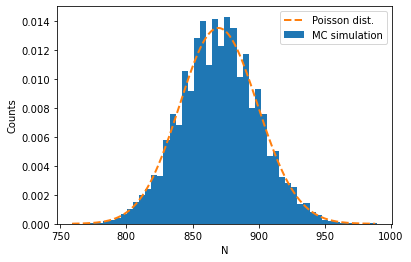

In [3]:
# 10**4 Monte Carlo simulations of detections performed by the detector during 10 seconds. 
r = efficiency*rate*time 
N = st.poisson.rvs(r,size=NC)
bins=50

# Histogram of the simulated data, comparing with the PDF of the process, a Poisson distribution
values,bin_lim,dum=plt.hist(N,bins,density=True, label='MC simulation')
x=np.arange(bin_lim[0],bin_lim[-1])
plt.plot(x,st.poisson.pmf(x,r), '--', label='Poisson dist.' , lw= 2)
plt.legend()
plt.xlabel('N')
plt.ylabel('Counts')
plt.savefig("Poisson.png")

In [4]:
# For each simulation Monte Carlo, takes the obtained number of detected muons and assigns to each of them an arrival 
# time between 0 and 1 following a uniform distribution. Then sorts the arrival times and computes the time difference between 
# events
t=[]

for k in N:
    dum = np.sort(np.random.uniform(0,10,k))
    for i in range(len(dum)-1):
        t.append(dum[i+1]-dum[i])        

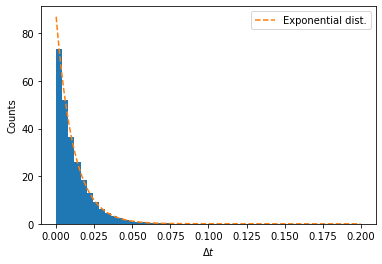

In [7]:
# Generates the histogram of the time differences and plots the exponential distribution corresponding to the interval between 
# consecutive events
values1,bin_lim1,dum1=plt.hist(t, bins, density=True)

x = np.linspace(bin_lim1[0], bin_lim1[-1], 200)
l=efficiency*rate
scale=1./l
y =st.expon.pdf(x,scale=scale) 

plt.plot(x,y,'--', label='Exponential dist.')
plt.legend()
plt.xlabel(r'$\Delta t$')
plt.ylabel('Counts')
plt.savefig("Time_int.png")